# Wine Wine Quality

The goal is to predict quality of the wine (red or white).
It can be classification or regression. Here we go with regression, try to predict the quality score.

### Data set information:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
The data set is publicly available.
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Data set description:

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)

### ML models:
1. Linear Regression
2. Polynomial Regression
3. Decision Tree Regression
4. Random Forest Regression
5. XGBoost
6. CatBoost
###Additional:
7. XGBoost Hyperparameter Tuning

## Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
sns.set()
%matplotlib inline

In [2]:
!pip install catboost

     |████████████████████████████████| 66.3MB 80kB/s 


In [4]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=";")
white_wine = pd.read_csv('winequality-white.csv', delimiter=";")

## Exploratory Data Analysis

In [5]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Since there are some big differences in properties between white and red wine (residual sugar, free sulfur dioxide, total sulfure dioxide) I'll not concatenate the data set, otherwise large outliers would occur.
Therefore, for the sake of clarity and simplicity, I'll separate red and white wines into separate Python notebooks and this will be white wine notebook.

In [11]:
dataset = white_wine.copy()

In [12]:
dataset.duplicated().sum()

937

It is unknown whether these are actual duplicates or more wines have the same properties and given that it is 19%, I'll not drop them, for now.

In [13]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine color']

### Numerical Columns

In [15]:
# Function for drawing numerical columns. Need to pass dimension (size_x and size_y), column name, and title.
def numerical_columns_histplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    
    ax.hist(dataset[column])
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)

    sns.despine()

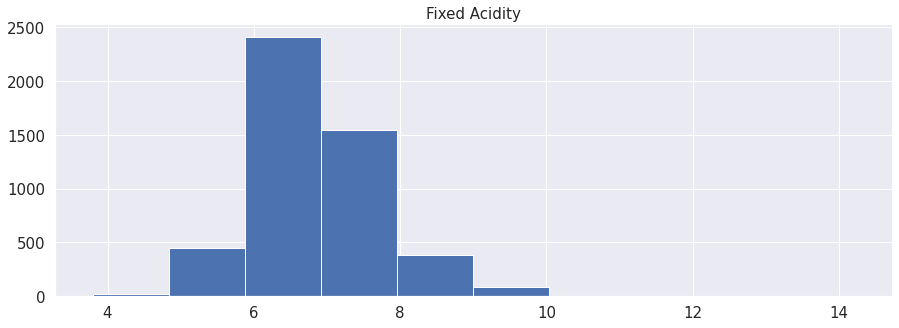

In [16]:
numerical_columns_histplot(15, 5, columns[0], "Fixed Acidity")

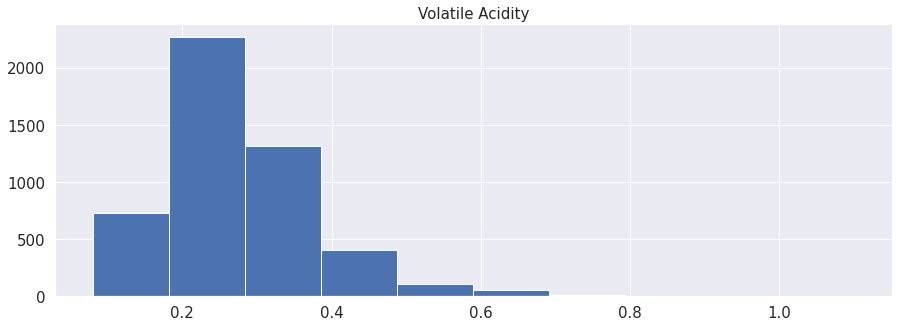

In [17]:
numerical_columns_histplot(15, 5, columns[1], "Volatile Acidity")

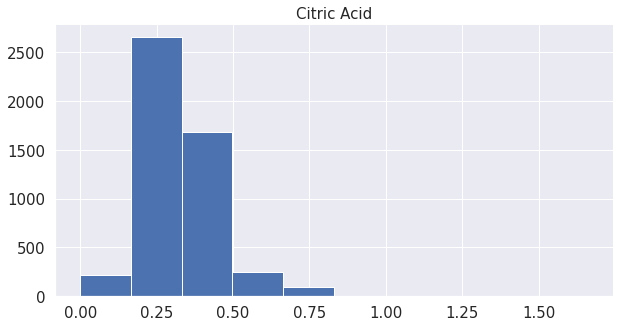

In [18]:
numerical_columns_histplot(10, 5, columns[2], "Citric Acid")

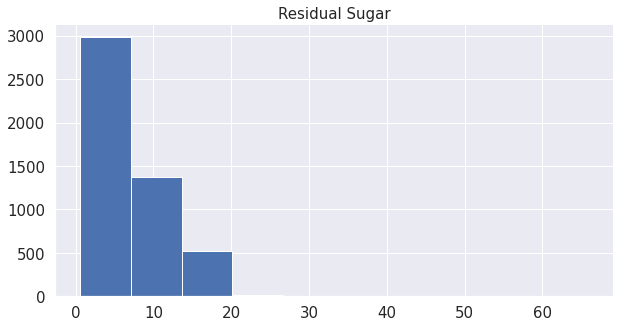

In [19]:
numerical_columns_histplot(10, 5, columns[3], "Residual Sugar")

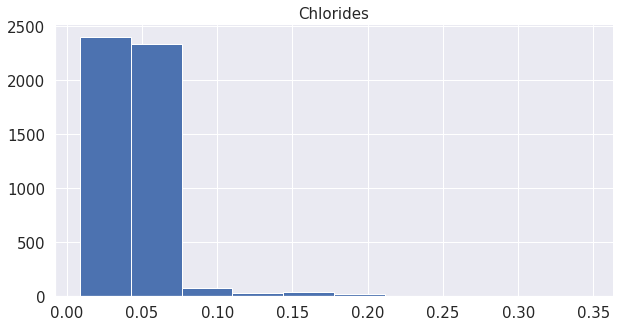

In [20]:
numerical_columns_histplot(10, 5, columns[4], "Chlorides")

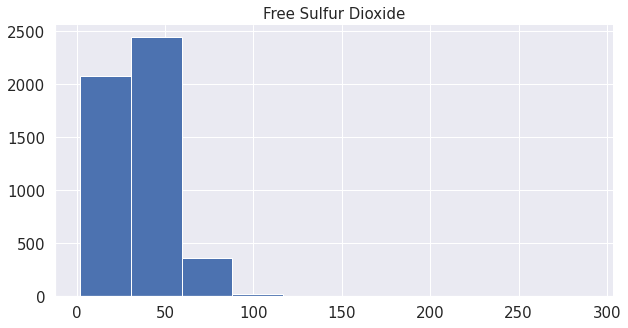

In [21]:
numerical_columns_histplot(10, 5, columns[5], "Free Sulfur Dioxide")

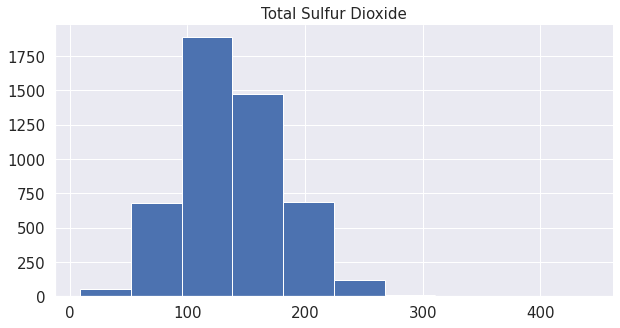

In [22]:
numerical_columns_histplot(10, 5, columns[6], "Total Sulfur Dioxide")

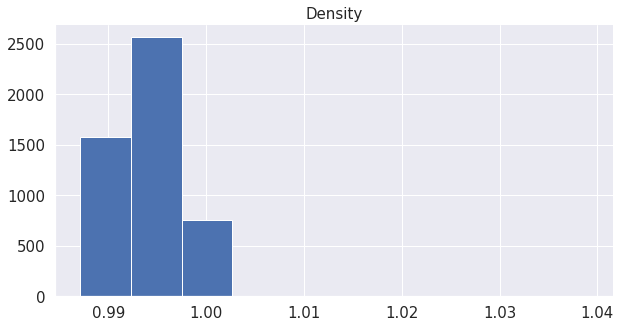

In [23]:
numerical_columns_histplot(10, 5, columns[7], "Density")

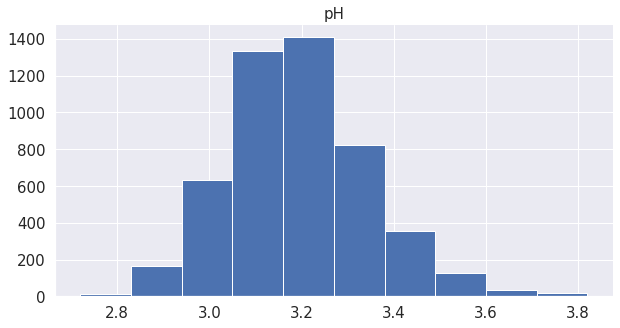

In [25]:
numerical_columns_histplot(10, 5, columns[8], "pH")

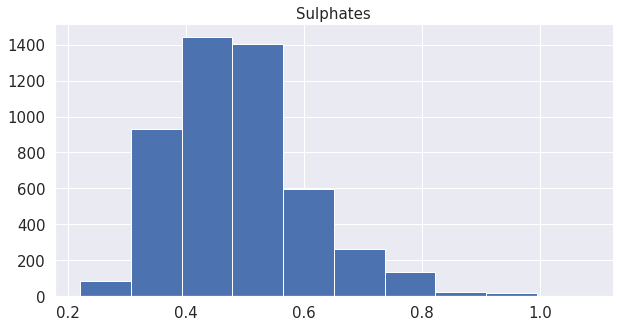

In [26]:
numerical_columns_histplot(10, 5, columns[9], "Sulphates")

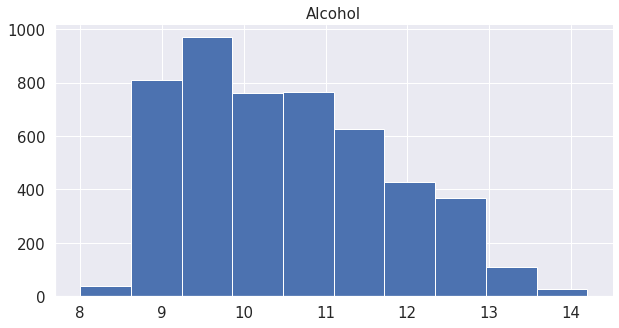

In [27]:
numerical_columns_histplot(10, 5, columns[10], "Alcohol")

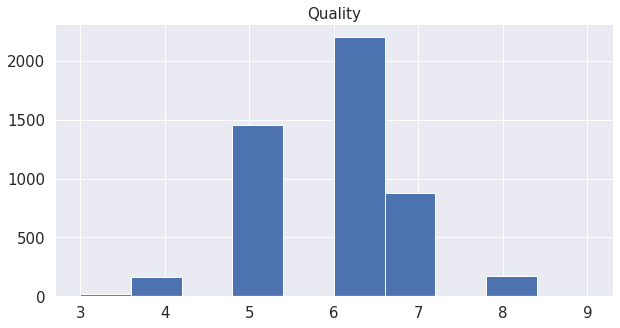

In [28]:
numerical_columns_histplot(10, 5, columns[11], "Quality")

### Comparing the Dependent variable with Independent variables

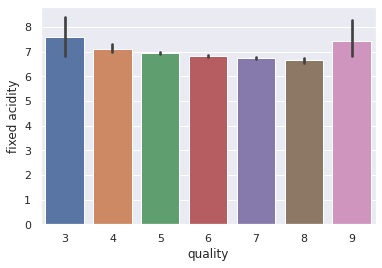

In [29]:
sns.barplot(x = "quality", y = columns[0], data = dataset)

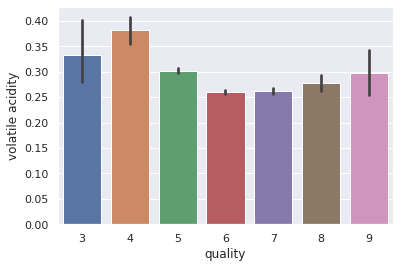

In [30]:
sns.barplot(x = "quality", y = columns[1], data = dataset)

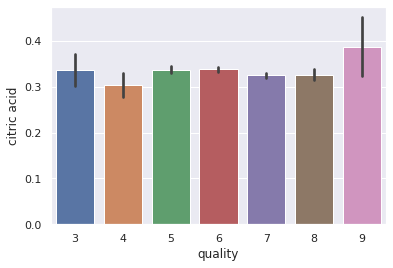

In [31]:
sns.barplot(x = "quality", y = columns[2], data = dataset)

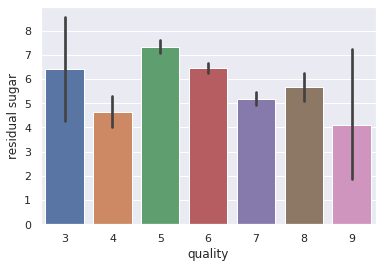

In [32]:
sns.barplot(x = "quality", y = columns[3], data = dataset)

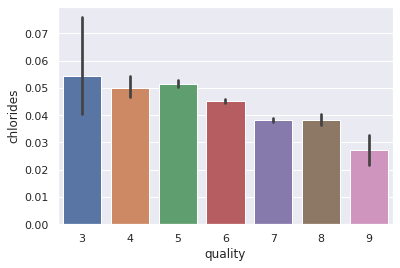

In [33]:
sns.barplot(x = "quality", y = columns[4], data = dataset)

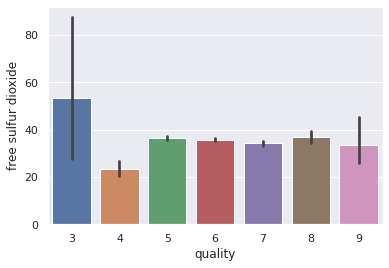

In [34]:
sns.barplot(x = "quality", y = columns[5], data = dataset)

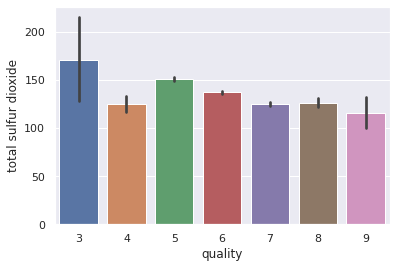

In [35]:
sns.barplot(x = "quality", y = columns[6], data = dataset)

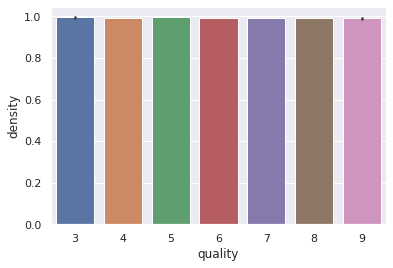

In [36]:
sns.barplot(x = "quality", y = columns[7], data = dataset)

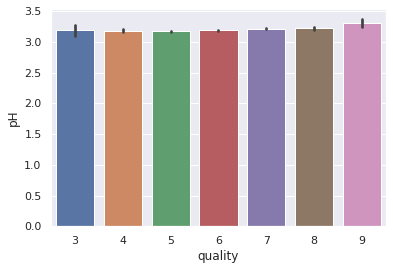

In [37]:
sns.barplot(x = "quality", y = columns[8], data = dataset)

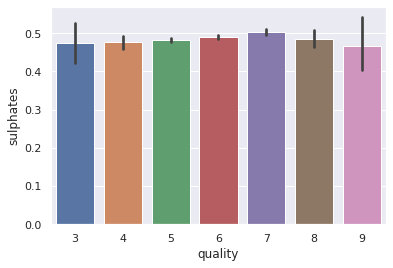

In [38]:
sns.barplot(x = "quality", y = columns[9], data = dataset)

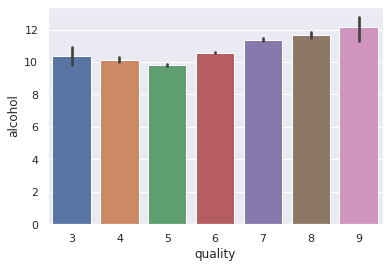

In [39]:
sns.barplot(x = "quality", y = columns[10], data = dataset)

### Searching for Outliers

In [40]:
def iqr_outliers(dataset):
    outliers = []
    
    for i in dataset:
        first_quartile = dataset.quantile(0.25)
        third_quartile = dataset.quantile(0.75)

        iqr = third_quartile - first_quartile
        lower_whisker = first_quartile - 1.5 * iqr
        uppwer_whisker = third_quartile + 1.5 * iqr
        
        if i > uppwer_whisker or i < lower_whisker:
            outliers.append(i)
        outliers.sort()
    
    print(f"Outliers: {len(outliers)} => {outliers}")

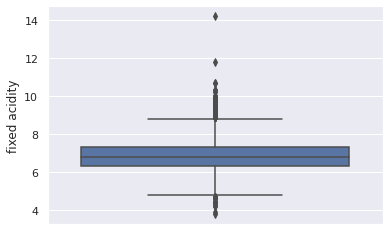

In [41]:
sns.boxplot(y=columns[0], data=dataset)

In [42]:
iqr_outliers(dataset[columns[0]])

Outliers: 119 => [3.8, 3.9, 4.2, 4.2, 4.4, 4.4, 4.4, 4.5, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.3, 9.3, 9.3, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.5, 9.5, 9.6, 9.6, 9.6, 9.6, 9.6, 9.7, 9.7, 9.7, 9.7, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.9, 9.9, 10.0, 10.0, 10.0, 10.2, 10.3, 10.3, 10.7, 10.7, 11.8, 14.2]


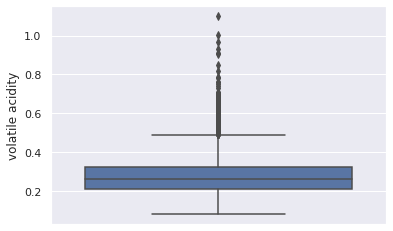

In [43]:
sns.boxplot(y=columns[1], data=dataset)

In [44]:
iqr_outliers(dataset[columns[1]])

Outliers: 186 => [0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.495, 0.495, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.545, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.555, 0.555, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.57, 0.57, 0.57, 0.57, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.585, 0.585, 0.59, 0.59, 0.59, 0.59, 0.595, 0.595, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.615, 0.615, 0.615, 0.615, 0.62, 0.62, 0.62, 0.62, 0.62, 0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.65, 0.65, 0.655, 0.655, 0.655, 0.66, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.67, 0.67, 0.68, 0.68, 0.68, 0.685, 0.69, 0.

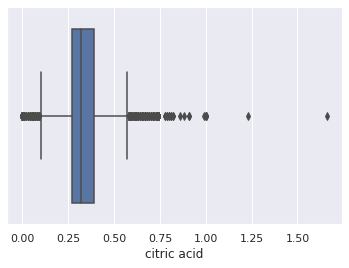

In [45]:
sns.boxplot(x=columns[2], data=dataset)

In [46]:
iqr_outliers(dataset[columns[2]])

Outliers: 270 => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.67, 0.67,

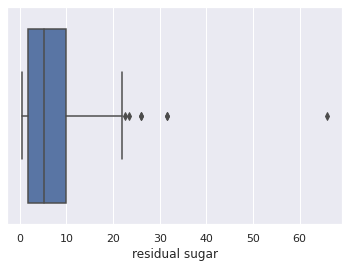

In [47]:
sns.boxplot(x=columns[3], data=dataset)

In [48]:
iqr_outliers(dataset[columns[3]])

Outliers: 7 => [22.6, 23.5, 26.05, 26.05, 31.6, 31.6, 65.8]


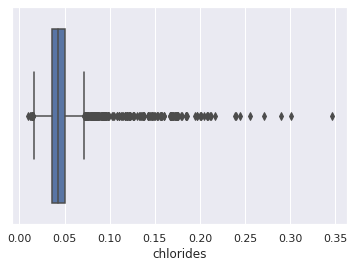

In [49]:
sns.boxplot(x=columns[4], data=dataset)

In [50]:
iqr_outliers(dataset[columns[4]])

Outliers: 212 => [0.009000000000000001, 0.012, 0.013000000000000001, 0.013999999999999999, 0.013999999999999999, 0.013999999999999999, 0.013999999999999999, 0.015, 0.015, 0.015, 0.015, 0.07200000000000001, 0.07200000000000001, 0.073, 0.073, 0.073, 0.073, 0.073, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.075, 0.075, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.077, 0.078, 0.078, 0.079, 0.079, 0.079, 0.079, 0.08, 0.08, 0.08, 0.08, 0.081, 0.081, 0.08199999999999999, 0.08199999999999999, 0.083, 0.083, 0.083, 0.083, 0.083, 0.084, 0.084, 0.084, 0.084, 0.084, 0.085, 0.085, 0.085, 0.086, 0.086, 0.086, 0.086, 0.087, 0.087, 0.087, 0.08800000000000001, 0.08800000000000001, 0.08900000000000001, 0.09, 0.09, 0.091, 0.092, 0.092, 0.092, 0.09300000000000001, 0.09300000000000001, 0.09300000000000001, 0.094, 0.094, 0.094, 0.094, 0.094, 0.095, 0.095, 0.096, 0.

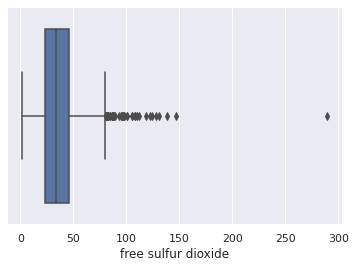

In [51]:
sns.boxplot(x=columns[5], data=dataset)

In [52]:
iqr_outliers(dataset[columns[5]])

Outliers: 50 => [81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 82.0, 82.0, 82.5, 83.0, 83.0, 83.0, 83.0, 85.0, 85.0, 86.0, 86.0, 87.0, 87.0, 87.0, 87.0, 88.0, 89.0, 93.0, 95.0, 96.0, 96.0, 96.0, 97.0, 98.0, 98.0, 98.0, 101.0, 101.0, 105.0, 105.0, 108.0, 108.0, 108.0, 110.0, 112.0, 118.5, 122.5, 124.0, 128.0, 131.0, 138.5, 146.5, 289.0]


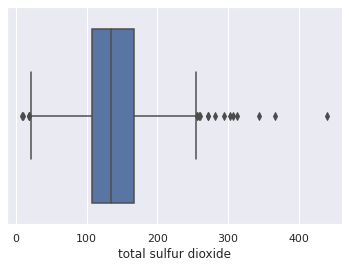

In [53]:
sns.boxplot(x=columns[6], data=dataset)

In [54]:
iqr_outliers(dataset[columns[6]])

Outliers: 19 => [9.0, 10.0, 18.0, 18.0, 19.0, 256.0, 256.0, 259.0, 260.0, 272.0, 272.0, 282.0, 294.0, 303.0, 307.5, 313.0, 344.0, 366.5, 440.0]


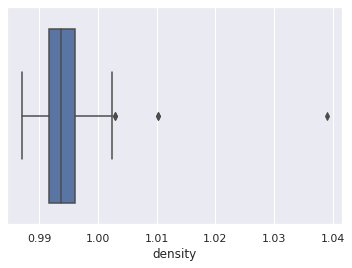

In [55]:
sns.boxplot(x=columns[7], data=dataset)

In [56]:
iqr_outliers(dataset[columns[7]])

Outliers: 5 => [1.00295, 1.00295, 1.0103, 1.0103, 1.03898]


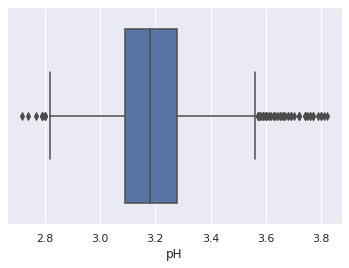

In [57]:
sns.boxplot(x=columns[8], data=dataset)

In [58]:
iqr_outliers(dataset[columns[8]])

Outliers: 75 => [2.72, 2.74, 2.77, 2.79, 2.79, 2.79, 2.8, 2.8, 2.8, 3.57, 3.57, 3.57, 3.57, 3.57, 3.58, 3.58, 3.58, 3.58, 3.58, 3.59, 3.59, 3.59, 3.59, 3.59, 3.59, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.61, 3.61, 3.61, 3.62, 3.63, 3.63, 3.63, 3.63, 3.63, 3.63, 3.64, 3.64, 3.65, 3.65, 3.65, 3.65, 3.66, 3.66, 3.66, 3.66, 3.66, 3.67, 3.68, 3.68, 3.69, 3.69, 3.7, 3.72, 3.72, 3.72, 3.74, 3.74, 3.75, 3.75, 3.76, 3.76, 3.77, 3.77, 3.79, 3.8, 3.8, 3.81, 3.82]


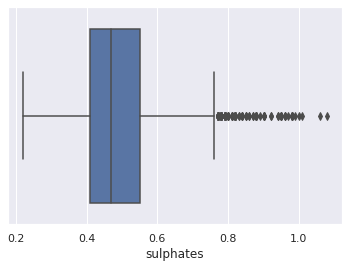

In [59]:
sns.boxplot(x=columns[9], data=dataset)

In [60]:
iqr_outliers(dataset[columns[9]])

Outliers: 124 => [0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.8, 0.8, 0.8, 0.8, 0.8, 0.81, 0.81, 0.81, 0.81, 0.81, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.83, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85, 0.85, 0.85, 0.86, 0.86, 0.87, 0.87, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.89, 0.9, 0.9, 0.9, 0.9, 0.9, 0.92, 0.92, 0.94, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 1.0, 1.01, 1.06, 1.08]


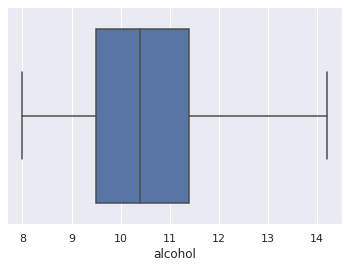

In [61]:
sns.boxplot(x=columns[10], data=dataset)

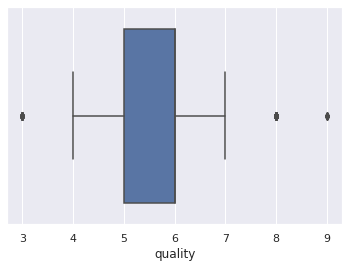

In [62]:
sns.boxplot(x=columns[11], data=dataset)

In [63]:
iqr_outliers(dataset[columns[10]])

Outliers: 0 => []


I'm not dropping any outliers at the moment because I believe the data is accurate and relevant to the model.

## Correlation Matrix

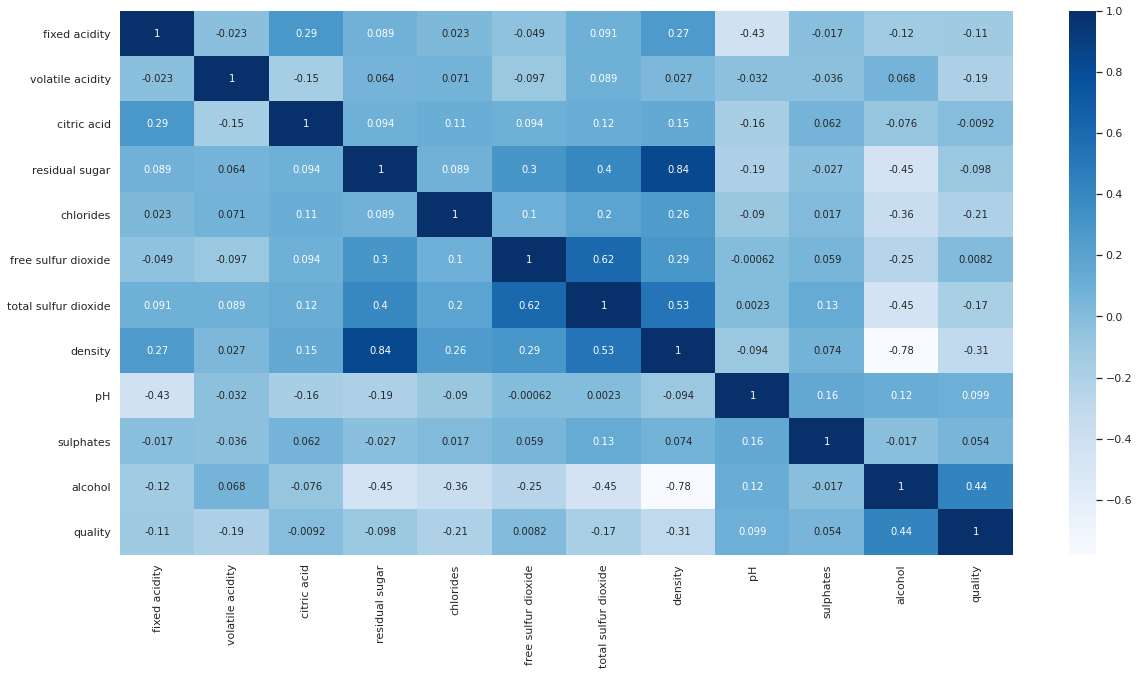

In [64]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), cmap='Blues', annot = True)

## Preparation for Training and Testing

Dropping: citric acid, residual sugar, free sulfur dioxide, pH, sulphates

In [65]:
cleaned_dataset = dataset.copy()
cleaned_dataset = cleaned_dataset[['fixed acidity', 'volatile acidity', 'citric acid', 
       'chlorides', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol']]

#### Defining dependent and independent variables

In [66]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

#### Splitting the dataset into the Training and Test set

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models

### 1. Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_pred = lin_regressor.predict(X_test)

In [71]:
lin_score = r2_score(y_test, y_pred)
lin_score = "{:.2f} %".format(lin_score*100)

In [72]:
accuracies = cross_val_score(estimator = lin_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_lin_reg = "{:.2f} %".format(accuracies.mean()*100)

In [73]:
results_df = pd.DataFrame(data=[["Linear Regression", val_accuracy_score_lin_reg, lin_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,68.77 %,55.62 %


### 2. Polynomial Regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
pol_regressor = LinearRegression()
pol_regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_pred = pol_regressor.predict(poly_reg.transform(X_test))

In [76]:
pol_score = r2_score(y_test, y_pred)
pol_score = "{:.2f} %".format(pol_score*100)

In [77]:
accuracies = cross_val_score(estimator = pol_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_pol_reg = "{:.2f} %".format(accuracies.mean()*100)

In [78]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", val_accuracy_score_pol_reg, pol_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,68.77 %,55.62 %
1,Polynomial Regression,68.77 %,-166243.21 %


### 3. Decision Tree Regression

In [79]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [80]:
y_pred = decision_tree_regressor.predict(X_test)

In [81]:
decision_tree_score = r2_score(y_test, y_pred)
decision_tree_score = "{:.2f} %".format(decision_tree_score*100)

In [82]:
accuracies = cross_val_score(estimator = decision_tree_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_decision_tree = "{:.2f} %".format(accuracies.mean()*100)

In [83]:
results_df_3 = pd.DataFrame(data=[["Decision Tree Regression", val_accuracy_score_decision_tree, decision_tree_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,68.77 %,55.62 %
1,Polynomial Regression,68.77 %,-166243.21 %
2,Decision Tree Regression,69.27 %,68.15 %


### 4. Random Forest Regression

In [84]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [85]:
y_pred = random_forest_regressor.predict(X_test)

In [86]:
random_forest_score = r2_score(y_test, y_pred)
random_forest_score = "{:.2f} %".format(random_forest_score*100)

In [87]:
accuracies = cross_val_score(estimator = random_forest_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_random_forest = "{:.2f} %".format(accuracies.mean()*100)

In [88]:
results_df_4 = pd.DataFrame(data=[["Random Forest Regression", val_accuracy_score_random_forest, random_forest_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,68.77 %,55.62 %
1,Polynomial Regression,68.77 %,-166243.21 %
2,Decision Tree Regression,69.27 %,68.15 %
3,Random Forest Regression,82.63 %,81.27 %


### 5. XGBoost

In [89]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(objective ='reg:squarederror')
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [90]:
y_pred = xgb_regressor.predict(X_test)

In [91]:
xgb_score = r2_score(y_test, y_pred)
xgb_score = "{:.2f} %".format(xgb_score*100)

In [92]:
accuracies = cross_val_score(estimator = xgb_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb = "{:.2f} %".format(accuracies.mean()*100)

In [93]:
results_df_5 = pd.DataFrame(data=[["XGBoost", val_accuracy_score_xgb, xgb_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,68.77 %,55.62 %
1,Polynomial Regression,68.77 %,-166243.21 %
2,Decision Tree Regression,69.27 %,68.15 %
3,Random Forest Regression,82.63 %,81.27 %
4,XGBoost,79.63 %,76.57 %


### 6. CatBoost

In [94]:
from catboost import CatBoostRegressor
cat_regressor = CatBoostRegressor()
cat_regressor.fit(X_train, y_train)

Learning rate set to 0.049201
0:	learn: 1.1912115	total: 50.1ms	remaining: 50s
1:	learn: 1.1538442	total: 52.1ms	remaining: 26s
2:	learn: 1.1166633	total: 54ms	remaining: 17.9s
3:	learn: 1.0840762	total: 56ms	remaining: 14s
4:	learn: 1.0516976	total: 58ms	remaining: 11.5s
5:	learn: 1.0204362	total: 59.8ms	remaining: 9.9s
6:	learn: 0.9945611	total: 61.5ms	remaining: 8.73s
7:	learn: 0.9674032	total: 63.8ms	remaining: 7.91s
8:	learn: 0.9421254	total: 65.8ms	remaining: 7.24s
9:	learn: 0.9193207	total: 67.6ms	remaining: 6.69s
10:	learn: 0.8972926	total: 69.5ms	remaining: 6.24s
11:	learn: 0.8772985	total: 71.4ms	remaining: 5.88s
12:	learn: 0.8588087	total: 73.3ms	remaining: 5.56s
13:	learn: 0.8414381	total: 75.1ms	remaining: 5.29s
14:	learn: 0.8249598	total: 77ms	remaining: 5.05s
15:	learn: 0.8097146	total: 79ms	remaining: 4.86s
16:	learn: 0.7948219	total: 81ms	remaining: 4.68s
17:	learn: 0.7801725	total: 83ms	remaining: 4.53s
18:	learn: 0.7674821	total: 84.9ms	remaining: 4.38s
19:	learn: 0.

In [95]:
y_pred = cat_regressor.predict(X_test)

In [96]:
cat_score = r2_score(y_test, y_pred)
cat_score = "{:.2f} %".format(cat_score*100)

In [97]:
accuracies = cross_val_score(estimator = cat_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_cat = "{:.2f} %".format(accuracies.mean()*100)

Streaming output truncated to the last 5000 lines.
4:	learn: 1.0558086	total: 9.18ms	remaining: 1.83s
5:	learn: 1.0255481	total: 11ms	remaining: 1.82s
6:	learn: 0.9990039	total: 12.7ms	remaining: 1.8s
7:	learn: 0.9725442	total: 14.5ms	remaining: 1.8s
8:	learn: 0.9473861	total: 16.2ms	remaining: 1.78s
9:	learn: 0.9236280	total: 17.9ms	remaining: 1.77s
10:	learn: 0.9013729	total: 19.7ms	remaining: 1.77s
11:	learn: 0.8813573	total: 21.6ms	remaining: 1.78s
12:	learn: 0.8616242	total: 23.3ms	remaining: 1.77s
13:	learn: 0.8444846	total: 25ms	remaining: 1.76s
14:	learn: 0.8274056	total: 26.9ms	remaining: 1.76s
15:	learn: 0.8119608	total: 28.6ms	remaining: 1.76s
16:	learn: 0.7973660	total: 30.4ms	remaining: 1.76s
17:	learn: 0.7831498	total: 32.2ms	remaining: 1.75s
18:	learn: 0.7699174	total: 33.9ms	remaining: 1.75s
19:	learn: 0.7574959	total: 35.7ms	remaining: 1.75s
20:	learn: 0.7459420	total: 37.5ms	remaining: 1.75s
21:	learn: 0.7349771	total: 39.3ms	remaining: 1.75s
22:	learn: 0.7254166	tota

In [98]:
results_df_5 = pd.DataFrame(data=[["CatBoost", val_accuracy_score_cat, cat_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,68.77 %,55.62 %
1,Polynomial Regression,68.77 %,-166243.21 %
2,Decision Tree Regression,69.27 %,68.15 %
3,Random Forest Regression,82.63 %,81.27 %
4,XGBoost,79.63 %,76.57 %
5,CatBoost,83.29 %,80.34 %


## XGBoost - Hyperparameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(X_train, y_train):
    parameters = {
        'colsample_bytree': [0.5, 0.7, 1],
        'gamma': [0, 1, 9],
        'learning_rate': [0.01, 0.1],
        'max_depth': [1, 3, 5, 7, 18],
        'min_child_weight': [0, 1, 3, 5, 10],
        'n_estimators' : [100, 150, 180],
        'objective': ['reg:squarederror'], 
        'reg_alpha': [1, 40, 100, 180],
        'reg_lambda': [0, 1]
    }

    xgb_regressor = XGBRegressor()

    grid_search = GridSearchCV(estimator = xgb_regressor,
                           param_grid = parameters,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    grid_search.fit(X_train, y_train)

    return grid_search.best_params_

In [102]:
hyperparameter_tuning(X_train, y_train)

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

{'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 18,
 'min_child_weight': 5,
 'n_estimators': 180,
 'objective': 'reg:squarederror',
 'reg_alpha': 1,
 'reg_lambda': 0}

In [103]:
xgb_regressor = XGBRegressor(colsample_bytree = 1,
                              gamma = 0,
                              learning_rate = 0.1,
                              max_depth = 18,
                              min_child_weight = 5,
                              n_estimators = 180,
                              objective = 'reg:squarederror',
                              reg_alpha = 1,
                              reg_lambda = 0)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=18, min_child_weight=5, missing=None, n_estimators=180,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=1, reg_lambda=0, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [104]:
y_pred = xgb_regressor.predict(X_test)

In [105]:
xgb_score_tuned = r2_score(y_test, y_pred)
xgb_score_tuned = "{:.2f} %".format(xgb_score_tuned*100)

In [106]:
accuracies = cross_val_score(estimator = xgb_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb_tunded = "{:.2f} %".format(accuracies.mean()*100)

In [107]:
results_df_6 = pd.DataFrame(data=[["XGBoost Tuned", val_accuracy_score_xgb_tunded, xgb_score_tuned]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,68.77 %,55.62 %
1,Polynomial Regression,68.77 %,-166243.21 %
2,Decision Tree Regression,69.27 %,68.15 %
3,Random Forest Regression,82.63 %,81.27 %
4,XGBoost,79.63 %,76.57 %
5,CatBoost,83.29 %,80.34 %
6,XGBoost Tuned,84.01 %,82.51 %
